In [1]:
from mmdet.apis import init_detector, inference_detector
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
import scipy.io
import json

config_file = 'mmdetection/configs/user_config/test_config.py'
checkpoint_file = "D:\\Repositories\\Impulseai\\t-raj\\centernet repos\\mm-detection\\epoch_28.pth"

# config_file = "D:\\Repositories\Impulseai\\t-raj\\centernet repos\\mm-detection\\mmdetection\\configs\\centernet\\centernet_resnet18_dcnv2_140e_coco.py"
# checkpoint_file = "D:\\Repositories\\Impulseai\\t-raj\\centernet repos\\mm-detection\\centernet_resnet18_dcnv2_140e_coco_20210702_155131-c8cd631f.pth"

model = init_detector(config_file, checkpoint_file, device='cuda') 


2022-06-23 21:58:36,830 - root - INFO - ModulatedDeformConvPack neck.deconv_layers.0.conv is upgraded to version 2.
2022-06-23 21:58:36,833 - root - INFO - ModulatedDeformConvPack neck.deconv_layers.2.conv is upgraded to version 2.
2022-06-23 21:58:36,835 - root - INFO - ModulatedDeformConvPack neck.deconv_layers.4.conv is upgraded to version 2.


load checkpoint from local path: D:\Repositories\Impulseai\t-raj\centernet repos\mm-detection\epoch_28.pth


d:\repositories\impulseai\t-raj\centernet repos\mm-detection\venv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
d:\repositories\impulseai\t-raj\centernet repos\mm-detection\venv\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch

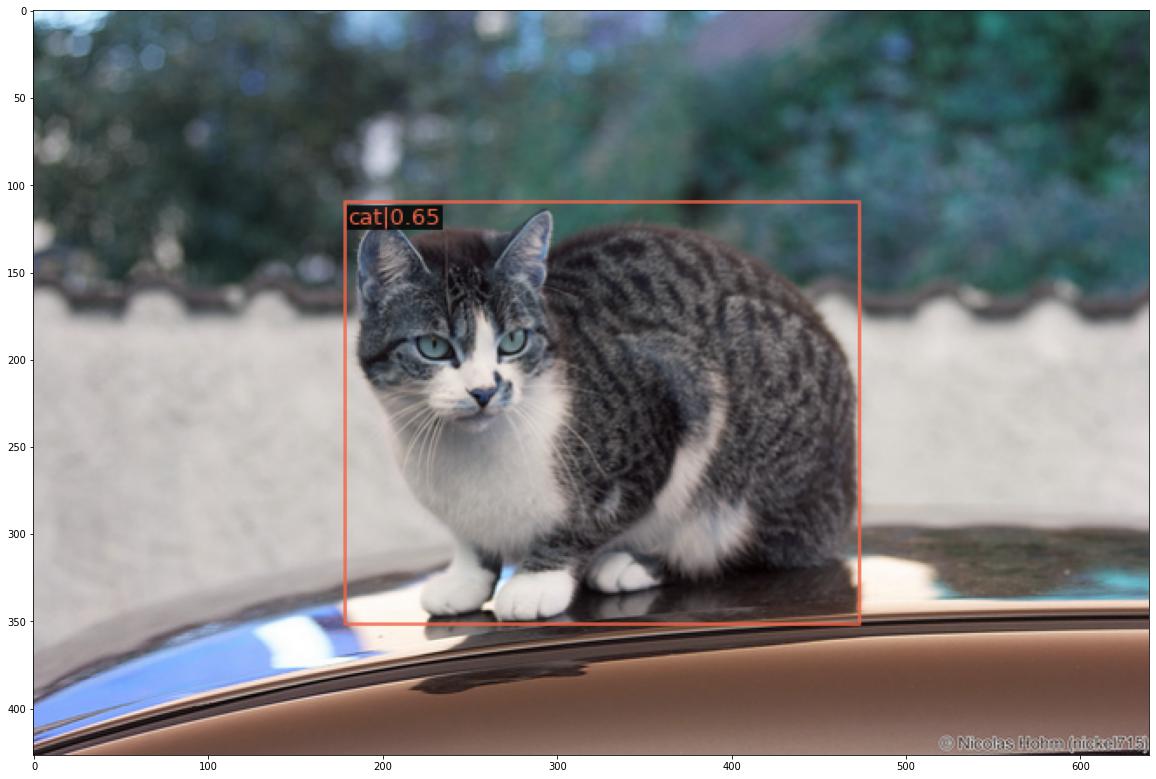

In [2]:
# show results via plt
# res has 80 classes by coco len(res) = 80
img = '000000000650.jpg'
res = inference_detector(model, img)
x = model.show_result(img, res, score_thr=0.5)
# model.show_result(img, res, out_file='res.jpg')

plt.figure(figsize = (20,20))

plt.imshow(x)

In [4]:
# show results without using model.show_result, using only opencv to identify the bboxes

window_name = 'Image'
idx = 16 # 16 for cat
# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (5, 5)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
  
# Line thickness of 2 px
thickness = 2
color = (255, 0, 0)
aw = cv2.imread(img)
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(aw, 
                      (round(res[idx][0][0]), round(res[idx][0][1])), 
                      (round(res[idx][0][2]), round(res[idx][0][3])), 
                      color, thickness)
  
# Displaying the image 
cv2.imshow(window_name, image)
cv2.waitKey(0)

-1

In [4]:
# show results using opencv in video but with model.show_result
# Create a VideoCapture object and read from input file
# vid_file = "D:\\Repositories\\Impulseai\\t-raj\\dataset\\VIS_Onshore\\Videos\\MVI_1469_VIS.avi"
# vid_file = "D:\\Repositories\\Impulseai\\New video.mp4"

vid_file = "path/to/video/of/coco128"

cap = cv2.VideoCapture(vid_file)
count = 0

# Check if camera opened successfully
if (cap.isOpened()==True): 
    
    while(cap.isOpened()):

      # Capture frame-by-frame
        ret, frame = cap.read()

        if ret == True:
            res = inference_detector(model, frame)
            img = model.show_result(frame, res, score_thr=0.34)
            
            scale_percent = 50 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            
            if count == 0:
                               
                fourcc = cv2.VideoWriter_fourcc(*'XVID')
                out = cv2.VideoWriter('output_1.avi', fourcc, 30.0, dim)
                count += 1
            
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            # Display the resulting frame
            cv2.imshow('Frame', resized)
            out.write(resized)
            # Press Q on keyboard to  exit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                  break

        # Break the loop
        else: 
            break

    # When everything done, release 
    # the video capture object
    cap.release()

    # Closes all the frames
    cv2.destroyAllWindows()
else:
    print("Error opening video  file")

d:\repositories\impulseai\t-raj\centernet repos\mm-detection\venv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
d:\repositories\impulseai\t-raj\centernet repos\mm-detection\venv\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch

In [ ]:
# visualization of VIS dataset using opencv
# Create a VideoCapture object and read from input file
# MVI_1469_VIS_ObjectGT.mat MVI_1469_VIS.avi
vid_file = "D:\\Repositories\\Impulseai\\t-raj\\dataset\\VIS_Onshore\\Videos\\MVI_1469_VIS.avi"
file = "D:\\Repositories\\Impulseai\\t-raj\\dataset\\VIS_Onshore\\ObjectGT\\MVI_1469_VIS_ObjectGT.mat"

mat = scipy.io.loadmat(file)
cap = cv2.VideoCapture(vid_file)
count = 0
cls = [
    "Ferry",
    "Buoy",
    "Vessel/ship",
    "Speed boat",
    "Boat",
    "Kayak",
    "Sail boat",
    "Swimming person",
    "Flying bird/plane",
    "Other"]
dataset_list = []
thickness = 2
color = (255, 0, 0)

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1

framecount = 0
count = 0
# Check if camera opened successfully
if (cap.isOpened()==True): 
    
    while(cap.isOpened()):

      # Capture frame-by-frame
        ret, img = cap.read()

        if ret == True:
            ddict = {}
            scale_percent = 50 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)

            # sample of classes per frame
            classes = mat['structXML'][0][framecount][4]
            classes = [classes[a] for a in range(len(classes)) if len(classes[a][0]) >= 1]
            # sample of bbox per frame
            bboxes = mat['structXML'][0][framecount][6]

            for a in range(len(classes)):
#                 if len(classes[a][0]) == 0: continue
#                 print(classes[a][0], bboxes[a])

                # Using cv2.rectangle() method
                # Draw a rectangle with blue line borders of thickness of 2 px
                image = cv2.rectangle(img, 
                                      (round(bboxes[a][0]), round(bboxes[a][1])), 
                                      (round(bboxes[a][0]+bboxes[a][2]), round(bboxes[a][1]+bboxes[a][3])), 
                                      color, thickness)



                # Using cv2.putText() method
                image = cv2.putText(image, classes[a][0][0], (round(bboxes[a][0])-20, round(bboxes[a][1])-20), 
                                    font, fontScale, color, thickness, cv2.LINE_AA)

            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            if count == 0:
                               
                fourcc = cv2.VideoWriter_fourcc(*'XVID')
                out = cv2.VideoWriter('output.avi', fourcc, 30.0, dim)
                count += 1
            out.write(resized)
#             print()
            # Display the resulting frame
            cv2.imshow('Frame', resized)
            # Press Q on keyboard to  exit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                  break
            framecount += 1
        # Break the loop
        else: 
            break

    # When everything done, release 
    # the video capture object
    cap.release()

    # Closes all the frames
    cv2.destroyAllWindows()
else:
    print("Error opening video  file")
    
print("Done")

In [6]:
# get all the frames from VIS and convert it to coco json file for training
# convert mat files to coco format as well

from tqdm import tqdm
import glob
import os
import cv2
from scipy import io

# get all mat and vid files using glob
# for trainml
vids_onshore = glob.glob("D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos/*")
vids_onboard = glob.glob("D:/Repositories/Impulseai/t-raj/dataset/VIS_Onboard/Videos/*")
vids_nir = glob.glob("D:/Repositories/Impulseai/t-raj/dataset/NIR/Videos/*")

mats_onshore = glob.glob("D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/ObjectGT/*")
mats_onboard = glob.glob("D:/Repositories/Impulseai/t-raj/dataset/VIS_Onboard/ObjectGT/*")
mats_nir = glob.glob("D:/Repositories/Impulseai/t-raj/dataset//NIR/ObjectGT/*")

image_basepath = "D:/Repositories/Impulseai/t-raj/dataset/VIS_cocoformat/images"

cls = [
    "Ferry",
    "Buoy",
    "Vessel/ship",
    "Speed boat",
    "Boat",
    "Kayak",
    "Sail boat",
    "Swimming person",
    "Flying bird/plane",
    "Other"]

# categories sample below
# categories=[{'id':0, 'name': 'balloon'}]
categ_list = []

for idx, c in enumerate(cls):
    # rerun this because before it was idx+1, it messes up the show_result in mmcv
    # but it workin well with opencv
    cat_dict = {'id': idx, 'name': c}
    categ_list.append(cat_dict)


image_list = []
annot_list = []
annot_id = 0
image_id = 0

# use glob glob to get mat and avi files for iteration
# vid_file = "D:\\Repositories\\Impulseai\\t-raj\\dataset\\VIS_Onshore\\Videos\\MVI_1469_VIS.avi"
# mat_file = "D:\\Repositories\\Impulseai\\t-raj\\dataset\\VIS_Onshore\\ObjectGT\\MVI_1469_VIS_ObjectGT.mat"

for vids, mats in zip([vids_onshore, vids_onboard], [mats_onshore, mats_onboard]):

    for vid_c, vid_file in tqdm(enumerate(vids)):
        sp = vid_file.split("_")
        skip = True
        for mat_file in mats:
            aw = 2
            if  "_Nir" in vid_file:
                aw = 2
            elif "_Onshore" in vid_file or "_Onboard" in vid_file:
                aw = 3
            if sp[aw] in mat_file:
                skip = False
                break
        if skip:
            print("skipping", vid_file)
            continue
        print(mat_file.split("\\")[-1], vid_file.split("\\")[-1])

        mat = io.loadmat(mat_file)
        cap = cv2.VideoCapture(vid_file)
        framecount = 0
        print(mat_file)
        print(vid_file)
        # Check if camera opened successfully
        if (cap.isOpened()==True): 

            while(cap.isOpened()):

                # Capture frame-by-frame
                ret, img = cap.read()
                
                if ret == True:
                                        
                    # use this for image dict
                    # image = {
                    #     "id": int,
                    #     "width": int,
                    #     "height": int,
                    #     "file_name": str, file_name should be based on video and frame e.g. MVI_1469_VIS-1.jpg
                    # }
                    image_dict = {
                        "id": image_id,
                        "width": img.shape[1],
                        "height": img.shape[0],
                        "file_name": str(image_id)+".jpg",
                    }
                    # sample of classes per frame
                    try:
                        classes = mat['structXML'][0][framecount][4]
        #                 [classes[a][0] for a in range(len(classes)) if len(classes[a][0]) == 1]
                        # sample of bbox per frame
                        bboxes = mat['structXML'][0][framecount][6]
                    except:
                        framecount += 1
                        continue

                    for a in range(len(classes)):
                    
                        try:
                            bboxes[a]
                            classes[a][0][0]
                        except:
                            continue
                        # for bbox it should be x, y, w, h
                        bbox = [bboxes[a][0], bboxes[a][1], bboxes[a][2], bboxes[a][3]]

                        # if theres no segmentation put it like this
                        # 'segmentation': []
                        # 'area': box_width * box_height
                        # 'iscrowd': 0             

                        # Sample Data annotation
                        #     data_anno = dict(
                        #     image_id=idx,
                        #     id=obj_count,
                        #     category_id=0,
                        #     bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                        #     area=(x_max - x_min) * (y_max - y_min),
                        #     segmentation=[poly],
                        #     iscrowd=0)
                        classname = classes[a][0][0]
                        data_anno = dict(
                                    image_id = image_id,
                                    id = annot_id,
                                    category_id = cls.index(classname),
                                    bbox = bbox,
                                    area = bbox[2] * bbox[3],
                                    segmentation = [],
                                    iscrowd = 0)
                        
                        annot_list.append(data_anno)
                        annot_id += 1
                    # ! important, save image in a folder
                    cv2.imwrite(os.path.join(image_basepath, str(image_id)+".jpg"), img)
                    #append to image_list
                    image_list.append(image_dict)
                    framecount += 1
                    image_id += 1
                # Break the loop
                else: 
                    break
            
            # When everything done, release 
            # the video capture object
            cap.release()

            # Closes all the frames
        else:
            print("Error opening video file")
            
# sample cocoformat


coco_format_json = dict(
    images=image_list,
    annotations=annot_list,
    categories=categ_list)

with open("D:/Repositories/Impulseai/t-raj/dataset/VIS_cocoformat/vis_coco.json", "w") as outfile:
    json.dump(coco_format_json, outfile)

40


0it [00:00, ?it/s]

MVI_1448_VIS_Haze_ObjectGT.mat MVI_1448_VIS_Haze.avi
D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/ObjectGT\MVI_1448_VIS_Haze_ObjectGT.mat
D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1448_VIS_Haze.avi


40it [00:02, 14.11it/s]

MVI_1448_VIS_Haze_ObjectGT.mat MVI_1451_VIS_Haze.avi
D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/ObjectGT\MVI_1448_VIS_Haze_ObjectGT.mat
D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1451_VIS_Haze.avi
MVI_1448_VIS_Haze_ObjectGT.mat MVI_1452_VIS_Haze.avi
D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/ObjectGT\MVI_1448_VIS_Haze_ObjectGT.mat
D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1452_VIS_Haze.avi
skipping D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1469_VIS.avi
skipping D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1470_VIS.avi
skipping D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1471_VIS.avi
skipping D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1474_VIS.avi
skipping D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1478_VIS.avi
skipping D:/Repositories/Impulseai/t-raj/dataset/VIS_Onshore/Videos\MVI_1479_VIS.avi
skipping D:/Repositories/Impulseai/t-r

In [ ]:
# visualizing coco format of VIS dataset
image_basepath = "D:\\Repositories\\Impulseai\\t-raj\\dataset\\VIS_cocoformat\\images"

for image_filename in coco_format_json['images']:
    image_filename = image_filename['file_name']
    image_file = os.path.join(image_basepath, image_filename)
    img = cv2.imread(image_file)
    scale_percent = 50 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    print(int(image_filename.split(".")[0]))
    ann = [annot for annot in coco_format_json['annotations'] if annot['image_id'] == int(image_filename.split(".")[0])]
    for a in ann:
        image = cv2.rectangle(img, 
                      (round(a['bbox'][0]), round(a['bbox'][1])), 
                      (round(a['bbox'][0]+a['bbox'][2]), round(a['bbox'][1]+a['bbox'][3])), 
                      (255, 0, 0), 3)

#         # Using cv2.putText() method
#         image = cv2.putText(image, classes[a][0][0], (round(bboxes[a][0])-20, round(bboxes[a][1])-20), 
#                             font, fontScale, color, thickness, cv2.LINE_AA)
    
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    cv2.imshow('Frame', resized)
    # Press Q on keyboard to  exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
#     break
cap.release()
cv2.destroyAllWindows()